# Overfitting & Underfitting Case
- <a href='https://notebook.community/karlstroetmann/Artificial-Intelligence/Python/4%20Linear%20Regression/Underfitting-Overfitting'>Reference case</a> 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model  import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
plt.rcParams['figure.figsize']=[10,6]

## 建立資料與執行線性迴歸

In [2]:
np.random.seed(0)
n = 30
π = np.pi
X = np.sort(np.random.rand(n))
y = np.cos(X*1.5*π) + np.random.randn(n)/10

X = np.reshape(X, (len(X),1))
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

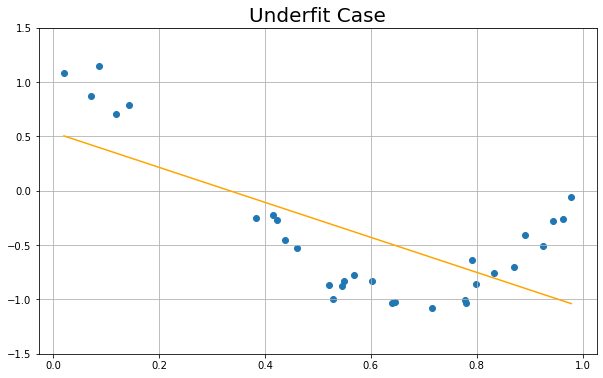

In [3]:
plt.scatter(X, y)
plt.plot(X, lr.predict(X), c='orange')
plt.title('Underfit Case',fontsize='20')
plt.ylim(-1.5, 1.5)
plt.grid(True)

### 上述的迴歸線能正確捕捉到資料的趨勢嗎? 檢查決定係數 $R^2$

In [4]:
from sklearn.metrics import r2_score
print(f'決定係數 R^2={r2_score(y, lr.predict(X))}') # 使用 metrics.r2_score(y_true, y_pred) 方法檢查 R^2
print(f'決定係數 R^2={lr.score(X,y)}')              # 使用 LinearRegression.score(X, y) 方法檢查 R^2

決定係數 R^2=0.4736796287494851
決定係數 R^2=0.4736796287494851


## 上述範例的迴歸線並未能適切的擬合資料

## 若是高度擬合，或是過度擬合 (Overfit) 的情況呢?

In [12]:
polynomial_features = PolynomialFeatures(degree=20)  # 20次多項式
X_poly = polynomial_features.fit_transform(X)
lr1 = LinearRegression()
lr1.fit(X_poly, y)
y_poly_pred = lr1.predict(X_poly)

print(lr1.intercept_, lr1.coef_)

-959.6481572553269 [ 0.00000000e+00  1.07041478e+05 -4.54902421e+06  1.04414626e+08
 -1.49174727e+09  1.43245379e+10 -9.69988663e+10  4.78121682e+11
 -1.75008314e+12  4.80074429e+12 -9.83314473e+12  1.46649369e+13
 -1.46941037e+13  6.84749864e+12  5.61390638e+12 -1.45787588e+13
  1.49997611e+13 -9.44896979e+12  3.77792059e+12 -8.87748351e+11
  9.39850788e+10]


In [28]:
polynomial_features = PolynomialFeatures(degree=4)  # 2次多項式
X_poly = polynomial_features.fit_transform(X)
X_poly[0:3]

array([[1.00000000e+00, 2.02183974e-02, 4.08783595e-04, 8.26494919e-06,
        1.67104028e-07],
       [1.00000000e+00, 7.10360582e-02, 5.04612156e-03, 3.58456585e-04,
        2.54633428e-05],
       [1.00000000e+00, 8.71292997e-02, 7.59151487e-03, 6.61443374e-04,
        5.76310980e-05]])

2 polynominal 決定係數 R^2=0.9308007859883201
15 polynominal 決定係數 R^2=0.989450166007161


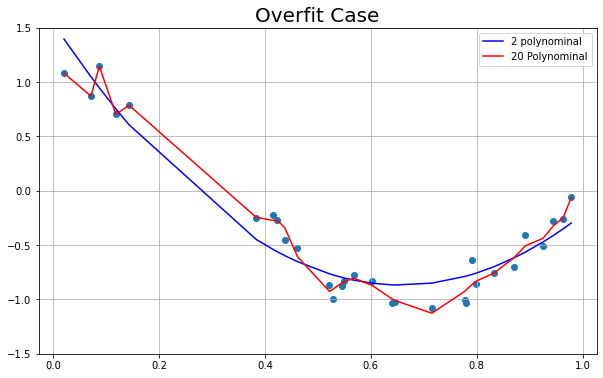

In [6]:
np.random.seed(0)
n = 30
π = np.pi
X = np.sort(np.random.rand(n))
y = np.cos(X*1.5*π) + np.random.randn(n)/10

X = np.reshape(X, (len(X),1))
#X = X[:, np.newaxis]

polynomial_features = PolynomialFeatures(degree=2)  # 2次多項式
X_poly = polynomial_features.fit_transform(X)
lr1 = LinearRegression()
lr1.fit(X_poly, y)
y_poly_pred = lr1.predict(X_poly)
plt.plot(X, y_poly_pred, color='b', label='2 polynominal')
print(f'2 polynominal 決定係數 R^2={r2_score(y, y_poly_pred)}')

polynomial_features = PolynomialFeatures(degree=20)  # 20 次多項式
X_poly = polynomial_features.fit_transform(X)
lr2 = LinearRegression()
lr2.fit(X_poly, y)
y_poly_pred = lr2.predict(X_poly)
plt.plot(X, y_poly_pred, color='r',label='20 Polynominal')
print(f'15 polynominal 決定係數 R^2={r2_score(y, y_poly_pred)}')

plt.scatter(X, y)
plt.title('Overfit Case',fontsize='20')
plt.ylim(-1.5, 1.5)
plt.legend(loc='best')
plt.grid(True)

### 上述結果，不論是 2 次多項式或是  15 次多項式，這兩個的 $R^2$ 值都遠勝於簡單線性迴歸的 $R^2$ = 0.47

### 但是，在訓練資料時，$𝑅^2$ 愈接近於 1 代表愈高度的擬合，此情況一定比較好嗎?

### 同樣產生 30 筆資料當成測試資料，經過訓練後產生 30 筆預估值如下:

In [16]:
np.random.seed(1)
n = 30
π = np.pi
X = np.sort(np.random.rand(n))
y = np.cos(X*1.5*π) + np.random.randn(n)/10
X = X[:, np.newaxis] # 將 X 改變為 2 維

In [17]:
polynomial_features = PolynomialFeatures(degree=2)  # 2次多項式
X_poly = polynomial_features.fit_transform(X)
y_poly_pred1 = lr1.predict(X_poly)
print(f'2 polynominal 決定係數 R^2={r2_score(y, y_poly_pred1)}') 

2 polynominal 決定係數 R^2=0.9010045549539848


In [18]:
polynomial_features = PolynomialFeatures(degree=15)  # 15次多項式
X_poly = polynomial_features.fit_transform(X)
y_poly_pred2 = lr2.predict(X_poly)
print(f'15 polynominal 決定係數 R^2={r2_score(y, y_poly_pred2)}') 

15 polynominal 決定係數 R^2=-59.10184087674584


## 當使用 15 次多項式時，雖然在訓練資料的$R^2$ 等於0.99 ，但測試資料的$R^2$ 卻等於 -59.1

2 polynominal 決定係數 R^2=0.9308007859883201
15 polynominal 決定係數 R^2=0.9883837174924418


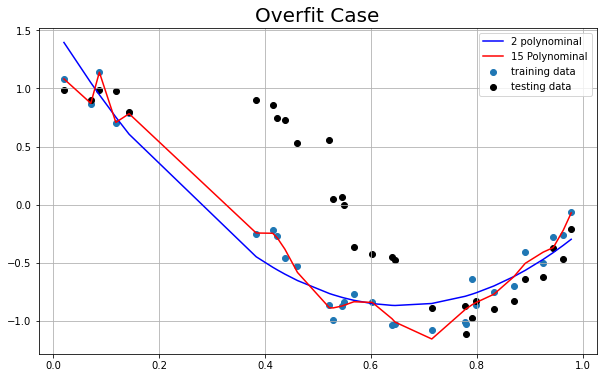

In [21]:
np.random.seed(0)
n = 30
π = np.pi
X = np.sort(np.random.rand(n))
y = np.cos(X*1.5*π) + np.random.randn(n)/10

X = np.reshape(X, (len(X),1))
#X = X[:, np.newaxis]

polynomial_features = PolynomialFeatures(degree=2)  # 2次多項式
X_poly = polynomial_features.fit_transform(X)
lr1 = LinearRegression()
lr1.fit(X_poly, y)
y_poly_pred = lr1.predict(X_poly)
plt.plot(X, y_poly_pred, color='b', label='2 polynominal')
print(f'2 polynominal 決定係數 R^2={r2_score(y, y_poly_pred)}') 

polynomial_features = PolynomialFeatures(degree=15)  # 15 次多項式
X_poly = polynomial_features.fit_transform(X)
lr2 = LinearRegression()
lr2.fit(X_poly, y)
y_poly_pred = lr2.predict(X_poly)
plt.plot(X, y_poly_pred, color='r',label='15 Polynominal')
print(f'15 polynominal 決定係數 R^2={r2_score(y, y_poly_pred)}')

plt.scatter(X, y, label='training data')

np.random.seed(1)
n = 30
π = np.pi
XX = np.sort(np.random.rand(n))
yy = np.cos(XX*1.5*π) + np.random.randn(n)/10
XX = X[:, np.newaxis] # 將 X 改變為 2 維

plt.scatter(XX, yy, c='black', label='testing data')

plt.title('Overfit Case',fontsize='20')
#plt.ylim(-1.5, 1.5)
plt.legend(loc='best')
plt.grid(True)